In [7]:
import pandas as pd

# Load the clinical dataset
clinical_data = pd.read_csv(r"D:\MRI\AD PaperID.csv")

# Check for missing values
print(clinical_data.isnull().sum())


ID         0
M/F        0
Hand       0
Age        0
Educ     185
SES      204
MMSE     185
CDR      185
eTIV       0
nWBV       0
ASF        0
Delay    373
dtype: int64


In [8]:
# Impute missing values with the mean for SES, MMSE, CDR, Delay
clinical_data['SES'].fillna(clinical_data['SES'].mean(), inplace=True)
clinical_data['MMSE'].fillna(clinical_data['MMSE'].mean(), inplace=True)
clinical_data['CDR'].fillna(clinical_data['CDR'].mean(), inplace=True)
clinical_data['Delay'].fillna(clinical_data['Delay'].mean(), inplace=True)

In [9]:
clinical_data['Educ'].fillna(clinical_data['Educ'].mode()[0], inplace=True)

In [10]:
# Convert Gender into numeric values
clinical_data['M/F'] = clinical_data['M/F'].map({'M': 0, 'F': 1})

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
# List of numerical features to scale
numeric_cols = ['Age', 'Educ', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF', 'Delay']

In [13]:
# Standardize the numeric columns
scaler = StandardScaler()
clinical_data[numeric_cols] = scaler.fit_transform(clinical_data[numeric_cols])

In [14]:
clinical_data.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,1,R,0.924014,-0.560148,0.626382,7.169327e-01,0.000000,-0.876816,-0.840407,0.833999,0.0
1,OAS1_0002_MR1,1,R,0.170775,1.208741,-1.879145,7.169327e-01,0.000000,-2.114451,0.279821,2.569273,0.0
2,OAS1_0003_MR1,1,R,0.884370,1.208741,0.626382,-5.456968e-02,0.500000,-0.185750,-1.425600,0.070479,0.0
3,OAS1_0004_MR1,0,R,-0.899618,-0.560148,0.000000,1.370464e-15,0.282927,0.656093,0.162782,-0.716179,0.0
4,OAS1_0005_MR1,0,R,-1.296060,-0.560148,0.000000,1.370464e-15,0.282927,1.592173,0.915174,-1.448850,0.0


In [15]:
#Image feature extraction

In [16]:
import os
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.resnet50 import ResNet50, preprocess_input
import numpy as np


In [17]:
# Initialize the ResNet50 model pre-trained on ImageNet
resnet_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')


In [18]:
# Function to load and preprocess an image
def load_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array)


In [19]:
# Paths to the two image folders
subj_111_folder = "D:\MRI\SUBJ_111_Full Image\SUBJ_111full image processed"
T88_111_folder = "D:\MRI\T88_111_Full Image\T88_111Fullimage processed"

In [20]:
# Extract image features for both datasets
subj_111_features = []
T88_111_features = []


In [21]:
# Loop through the clinical data and load corresponding images
for image_id in clinical_data['ID']:
    subj_111_img_path = os.path.join(subj_111_folder, image_id + '.png')  # Assuming .png format
    T88_111_img_path = os.path.join(T88_111_folder, image_id + '.png')    # Assuming .png format
    
    # Load and extract features for subj_111
    subj_img = load_image(subj_111_img_path)
    subj_features = resnet_model.predict(subj_img)
    subj_111_features.append(subj_features.flatten())
    
    # Load and extract features for T88_111
    T88_img = load_image(T88_111_img_path)
    T88_features = resnet_model.predict(T88_img)
    T88_111_features.append(T88_features.flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [22]:
# Convert list of features to numpy arrays
subj_111_features = np.array(subj_111_features)
T88_111_features = np.array(T88_111_features)

In [23]:
#Combine Clinical Data with Image Features

In [24]:
# Step 1: Drop the 'ID' and 'label' columns before training
clinical_features = clinical_data.drop(['ID'], axis=1).values

In [25]:
# Step 2: Combine clinical features with image features from subj_111 and T88_111
combined_features = np.concatenate([clinical_features, subj_111_features, T88_111_features], axis=1)

In [26]:
# Define labels: 1 if CDR >= 0.5, 0 otherwise
clinical_data['label'] = (clinical_data['CDR'] >= 0.5).astype(int)

# Extract labels as a numpy array
labels = clinical_data['label'].values


In [27]:
# Encoding the 'Hand' column (assuming 'R' for right-handed, 'L' for left-handed)
clinical_data['Hand'] = clinical_data['Hand'].map({'R': 1, 'L': 0})

# You should also check other columns for categorical data and encode them similarly if needed


In [28]:
# Check for non-numeric data types
print(clinical_data.dtypes)


ID        object
M/F        int64
Hand       int64
Age      float64
Educ     float64
SES      float64
MMSE     float64
CDR      float64
eTIV     float64
nWBV     float64
ASF      float64
Delay    float64
label      int32
dtype: object


In [29]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Convert clinical_features to DataFrame for easier handling of columns
clinical_features_df = pd.DataFrame(clinical_features)

# Convert all relevant columns to numeric, coercing errors to NaN for any non-numeric entries
for col in clinical_features_df.columns:
    clinical_features_df[col] = pd.to_numeric(clinical_features_df[col], errors='coerce')

# Define an imputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to the clinical features after handling non-numeric anomalies
clinical_features_imputed = imputer.fit_transform(clinical_features_df)

# Assuming subj_111_features and T88_111_features are already in numerical format
combined_features = np.concatenate([clinical_features_imputed, subj_111_features, T88_111_features], axis=1)

# Scale the combined features
scaler = StandardScaler()
combined_features_scaled = scaler.fit_transform(combined_features)

# Now combined_features_scaled is ready for modeling


In [30]:
#Model Development

In [31]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import time

In [32]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(combined_features, labels, test_size=0.2, random_state=42)

In [33]:
# Start timing
start_time = time.time()# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [34]:
# Predict on the test set
y_pred = model.predict(X_test)
# End timing
end_time = time.time()



In [35]:
# Evaluate the model
print(classification_report(y_test, y_pred))
#Calculate the total time taken
execution_time = end_time - start_time
print(f"Total execution time: {execution_time} seconds")

              precision    recall  f1-score   support

           0       0.90      0.98      0.94        63
           1       0.89      0.53      0.67        15

    accuracy                           0.90        78
   macro avg       0.89      0.76      0.80        78
weighted avg       0.90      0.90      0.89        78

Total execution time: 3.906155586242676 seconds


In [36]:
#Checking that the Images Are Being Used:

In [37]:
print(f"Shape of clinical features: {clinical_features_imputed.shape}")
print(f"Shape of subj_111 image features: {subj_111_features.shape}")
print(f"Shape of T88_111 image features: {T88_111_features.shape}")
print(f"Shape of combined features: {combined_features.shape}")


Shape of clinical features: (390, 10)
Shape of subj_111 image features: (390, 2048)
Shape of T88_111 image features: (390, 2048)
Shape of combined features: (390, 4106)


In [38]:
#XG Boost Model

In [39]:
import xgboost as xgb
import time
from sklearn.metrics import classification_report

In [40]:
# Calculate the ratio of the number of samples for each class
neg_class = sum(y_train == 0)
pos_class = sum(y_train == 1)
scale_pos_weight = neg_class / pos_class

In [41]:
# Initialize XGBoost model with the class imbalance weight
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    random_state=42,
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='logloss'
)

In [42]:
# Start timing
start_time = time.time()# Train the model# Fit the model on the training data
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [43]:
# Make predictions
y_pred_xgb = xgb_model.predict(X_test)
# End timing
end_time = time.time()


In [44]:
# Evaluate the performance
print(classification_report(y_test, y_pred_xgb))
#Calculate the total time taken
execution_time = end_time - start_time
print(f"Total execution time: {execution_time} seconds")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        15

    accuracy                           1.00        78
   macro avg       1.00      1.00      1.00        78
weighted avg       1.00      1.00      1.00        78

Total execution time: 6.677797317504883 seconds


In [45]:
import time
from sklearn.svm import SVC


In [46]:
# SVM Model Development

# Initialize SVM model
svm_model = SVC(kernel='linear', random_state=42)

start_time = time.time()# Train the model# Fit the model on the training data
# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)
# End timing
end_time = time.time()






In [47]:
# Evaluate the performance of SVM
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
#Calculate the total time taken
execution_time = end_time - start_time
print(f"Total execution time: {execution_time} seconds")

# Confusion Matrix for SVM
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix for SVM:")
print(confusion_matrix_svm)


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.75      0.80      0.77        15

    accuracy                           0.91        78
   macro avg       0.85      0.87      0.86        78
weighted avg       0.91      0.91      0.91        78

Total execution time: 0.9748103618621826 seconds
Confusion Matrix for SVM:
[[59  4]
 [ 3 12]]


In [48]:
import pandas as pd
import os
import numpy as np
import time
from keras.preprocessing.image import load_img, img_to_array
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

In [49]:
# Define function to load images into a 4D array
def load_images(folder, image_ids):
    images = []
    for image_id in image_ids:
        img_path = os.path.join(folder, image_id + '.png')  # Assuming .png format
        img = load_img(img_path, target_size=(224, 224))  # Resize to match CNN input
        img_array = img_to_array(img) / 255.0  # Normalize pixel values
        images.append(img_array)
    return np.array(images)


In [ ]:
# Load the original images for both datasets
subj_111_images = load_images(subj_111_folder, clinical_data['ID'])
T88_111_images = load_images(T88_111_folder, clinical_data['ID'])

In [ ]:
# Combine the images for CNN
X_cnn = np.concatenate([subj_111_images, T88_111_images], axis=0)

In [ ]:
# Create the labels for CNN
clinical_data['label'] = (clinical_data['CDR'] >= 0.5).astype(int)  # Binary labels
labels = clinical_data['label'].values
y_cnn = np.concatenate([labels, labels], axis=0)  # Assuming the same labels for both datasets

In [ ]:
# One-hot encode the labels for CNN
y_cnn_one_hot = to_categorical(y_cnn)

In [ ]:
# Define the CNN model
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(2, activation='softmax'))  # Output layer for binary classification


In [ ]:
# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_cnn, y_cnn_one_hot, test_size=0.2, random_state=42)


In [57]:
start_time = time.time()
# Train the model
cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

20/20 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.8030 - loss: 0.4991 - val_accuracy: 0.7500 - val_loss: 0.5273
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.7869 - loss: 0.4545 - val_accuracy: 0.7500 - val_loss: 0.4999
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.7795 - loss: 0.4048 - val_accuracy: 0.7500 - val_loss: 0.4456
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.8127 - loss: 0.3399 - val_accuracy: 0.7500 - val_loss: 0.4534
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.8187 - loss: 0.3494 - val_accuracy: 0.7692 - val_loss: 0.4499
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.8624 - loss: 0.3157 - val_accuracy: 0.8013 - val_loss: 0.4217
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.8817 - loss: 0.2840 - val_accuracy: 0.7885 - val_loss: 0.4460
Epoch 10/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.8808 - loss: 0.2680 - val_accuracy: 0.8013 - val_loss: 0.4273


In [58]:
# Evaluate the model on the test set
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 473ms/step - accuracy: 0.8109 - loss: 0.3957
Test Loss: 0.4273
Test Accuracy: 0.8013


In [59]:
# Make predictions on the test set
y_pred = cnn_model.predict(X_test)
# End timing
end_time = time.time()


# Convert predictions from probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert true labels from one-hot encoding back to class labels
y_test_classes = np.argmax(y_test, axis=1)


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 573ms/step


In [60]:
from sklearn.metrics import classification_report

# Generate classification report
print(classification_report(y_test_classes, y_pred_classes, target_names=['Class 0', 'Class 1']))
#Calculate the total time taken
execution_time = end_time - start_time
print(f"Total execution time: {execution_time} seconds")


              precision    recall  f1-score   support

     Class 0       0.86      0.87      0.87       117
     Class 1       0.61      0.59      0.60        39

    accuracy                           0.80       156
   macro avg       0.73      0.73      0.73       156
weighted avg       0.80      0.80      0.80       156

Total execution time: 367.61677598953247 seconds


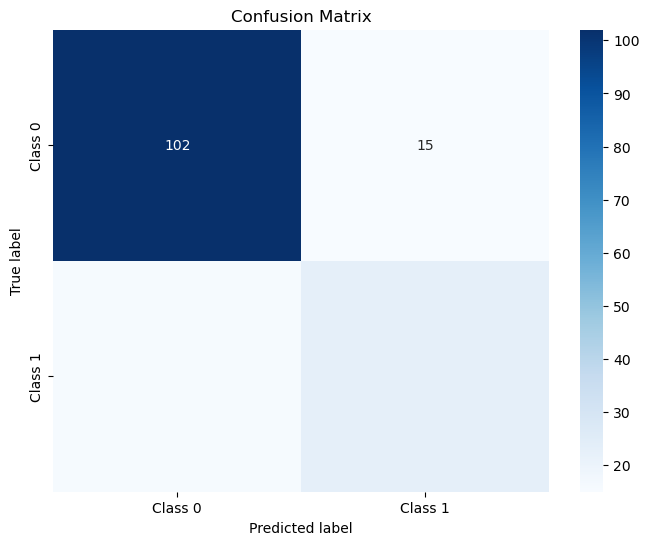

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()


D:\aconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


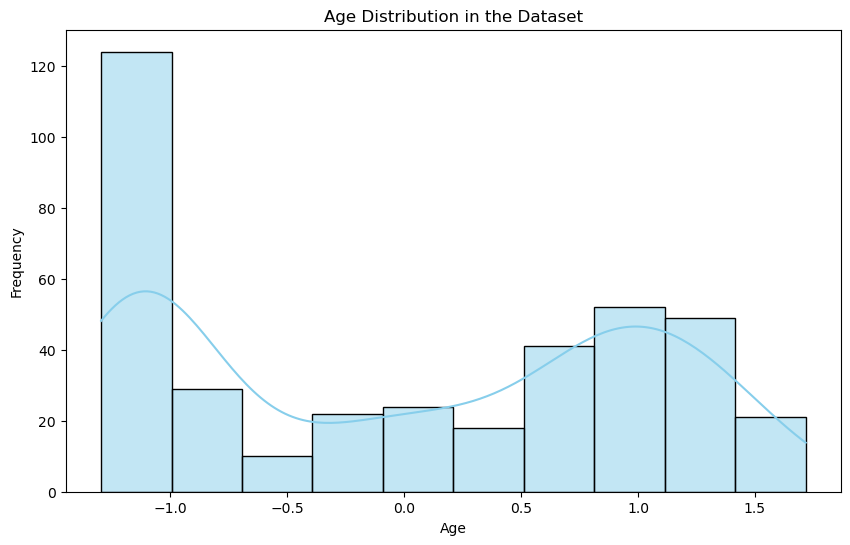

In [62]:
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=clinical_data, x='Age', kde=True, color='skyblue')
plt.title('Age Distribution in the Dataset')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


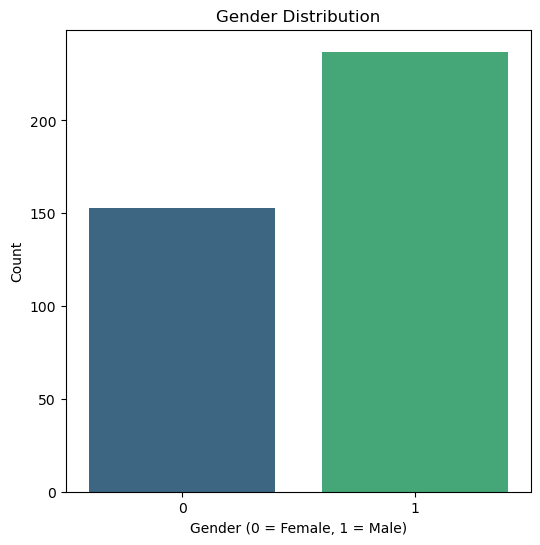

In [63]:
# Gender Distribution
plt.figure(figsize=(6, 6))
sns.countplot(data=clinical_data, x='M/F', palette='viridis')
plt.title('Gender Distribution')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.show()


D:\aconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


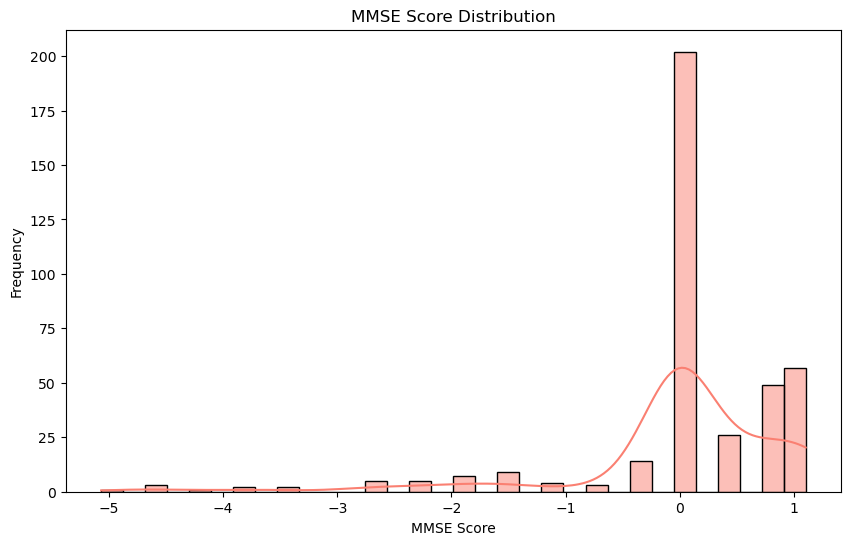

In [64]:
# MMSE Score Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=clinical_data, x='MMSE', kde=True, color='salmon')
plt.title('MMSE Score Distribution')
plt.xlabel('MMSE Score')
plt.ylabel('Frequency')
plt.show()


D:\aconda\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


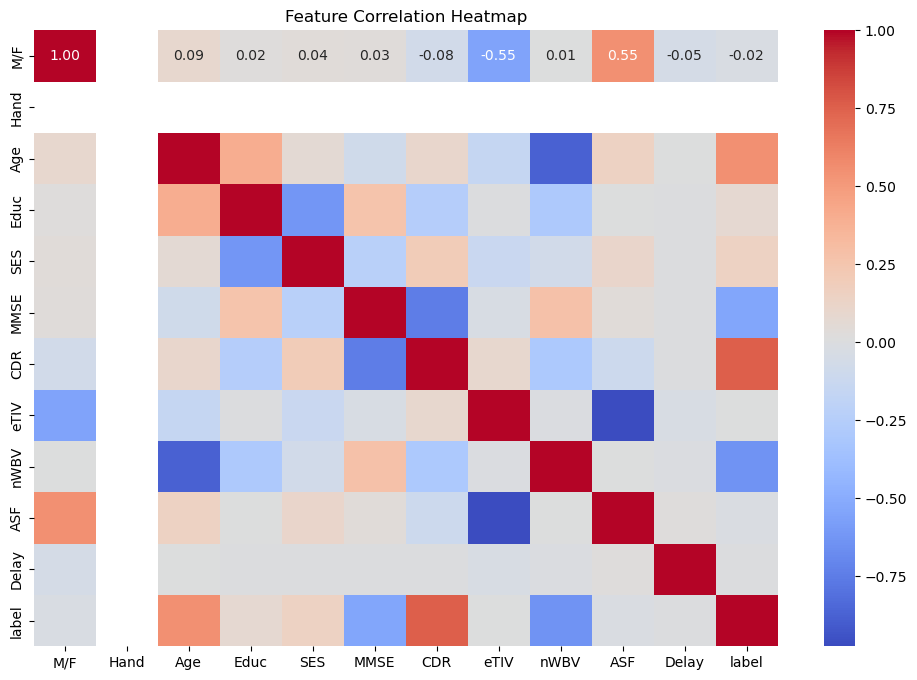

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_data = clinical_data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()
